In [115]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn import preprocessing
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [116]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [135]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


NameError: name 'yhat' is not defined

In [118]:
df.groupby('country').agg('min')

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
country,,,,,,,,,,,
France,15565714,350,Female,18,0,0.00,1,0,0,90.07,0
Germany,15565779,350,Female,18,0,27288.43,1,0,0,11.58,0
Spain,15565701,350,Female,18,0,0.00,1,0,0,417.41,0


In [119]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [120]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [121]:
df2=pd.get_dummies(df)

In [122]:
df2.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'],
      dtype='object')

<AxesSubplot:>

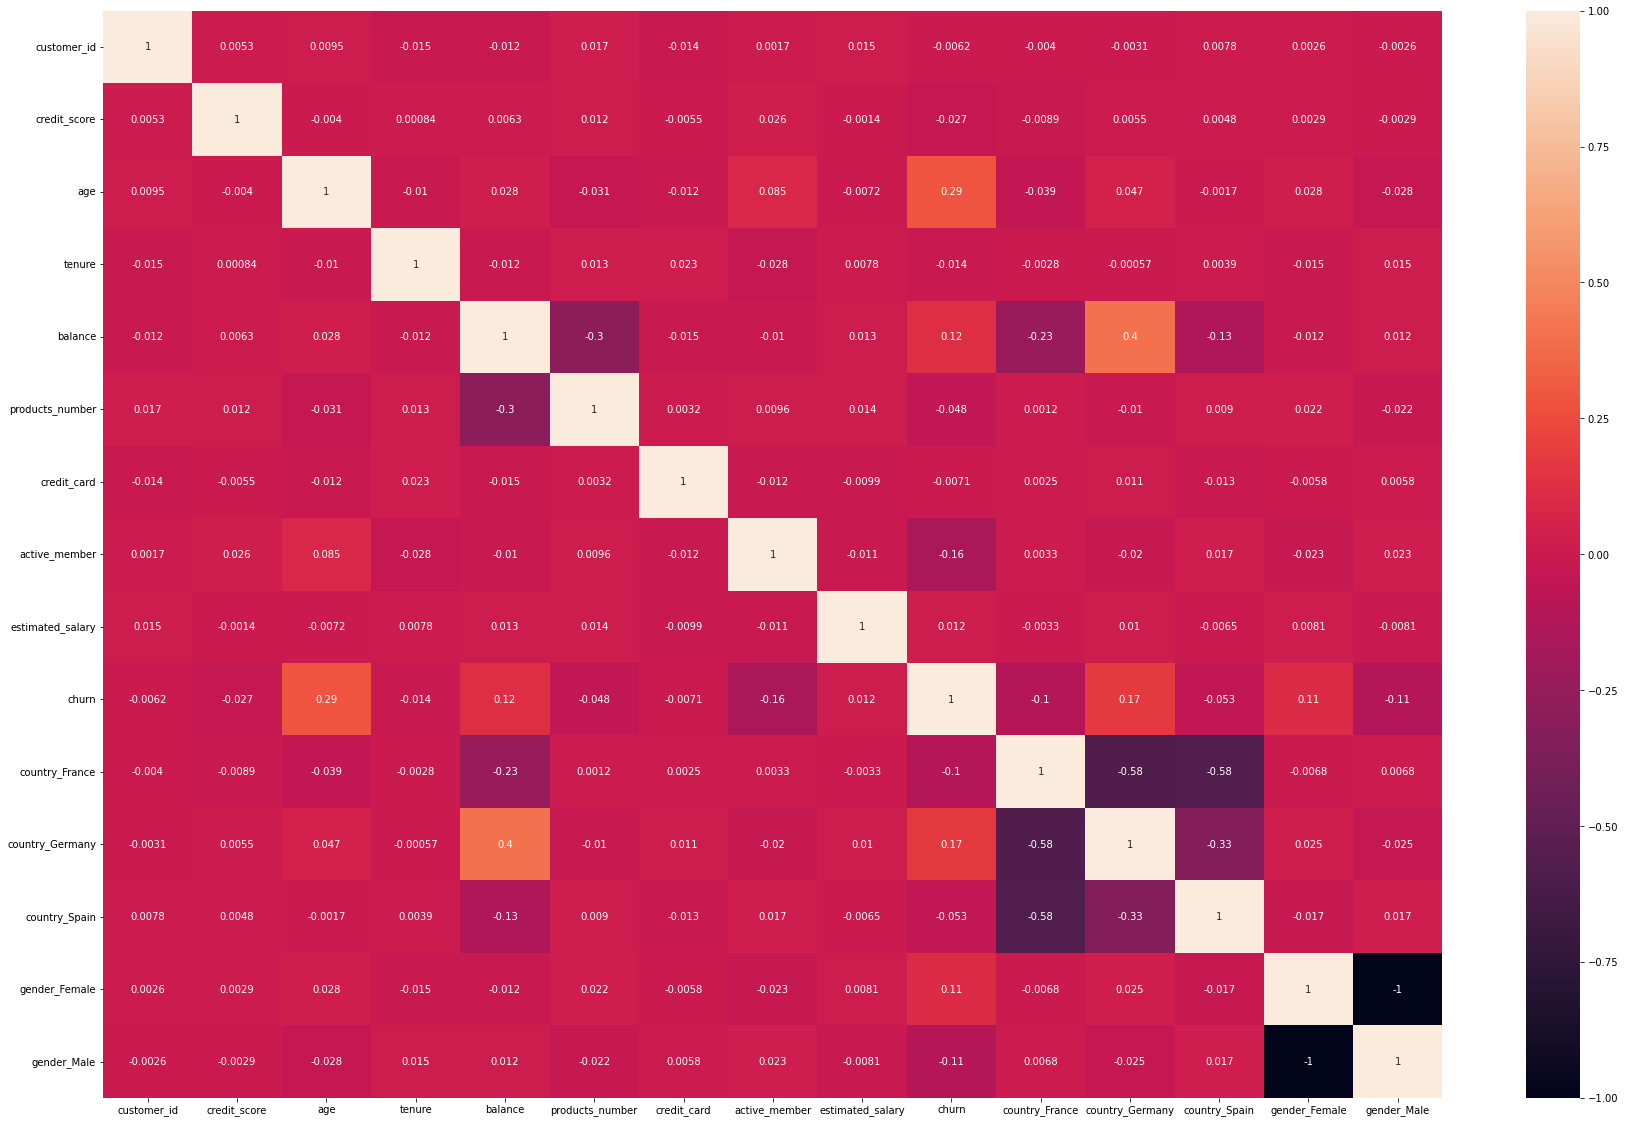

In [123]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,20)) 
corrM = df2.corr()
sns.heatmap(corrM, annot=True, ax=ax)


### As we there is low correlation betwen churn and credit card, and tenure


In [124]:
df2.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [125]:
a=['credit_score', 'age', 'tenure', 'balance',  'estimated_salary']
for i in a:
    df2[a]=(df2[a]-df2[a].min())/(df2[a].max()-df2[a].min())

df2.head()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,15647311,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,15619304,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,15701354,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,15737888,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [126]:
df2.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,0.601058,0.282727,0.501280,0.304848,1.530200,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,7.193619e+04,0.193307,0.141727,0.289217,0.248696,0.581654,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,1.556570e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,0.468000,0.189189,0.300000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,0.604000,0.256757,0.500000,0.387402,1.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.575323e+07,0.736000,0.351351,0.700000,0.508749,2.000000,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.581569e+07,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
X = np.asarray(df2[['customer_id', 'credit_score', 'age', 'balance',
       'products_number', 'active_member', 'estimated_salary',
        'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male']])
X[0:5]

array([[1.56e+07, 5.38e-01, 3.24e-01, 0.00e+00, 1.00e+00, 1.00e+00,
        5.07e-01, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.56e+07, 5.16e-01, 3.11e-01, 3.34e-01, 1.00e+00, 1.00e+00,
        5.63e-01, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.56e+07, 3.04e-01, 3.24e-01, 6.36e-01, 3.00e+00, 0.00e+00,
        5.70e-01, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.57e+07, 6.98e-01, 2.84e-01, 0.00e+00, 2.00e+00, 0.00e+00,
        4.69e-01, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.57e+07, 1.00e+00, 3.38e-01, 5.00e-01, 1.00e+00, 1.00e+00,
        3.95e-01, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00]])

In [202]:
df2['churn'] = df2['churn'].astype('int')
Y= np.asarray(df2['churn'])
Y[0:5]

array([1, 0, 1, 0, 0])

### Lets try ro found some clusters in data


In [203]:
from sklearn.cluster import DBSCAN 


In [204]:
epsilon = 1.16 # 2 max standart deviations
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [205]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, ..., False, False, False])

In [206]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

### so, db scan dot se any clusters in our data


## Test/train split

In [207]:

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 12) (8000,)
Test set: (2000, 12) (2000,)


## Logreg

In [208]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [209]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [210]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.73, 0.27],
       [0.83, 0.17],
       [0.87, 0.13],
       ...,
       [0.71, 0.29],
       [0.63, 0.37],
       [0.85, 0.15]])

In [211]:

jaccard_score(y_test, yhat,pos_label=0)

0.8137100994243851

### Greed search


In [212]:

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,error_score='raise')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8092499999999999


In [221]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.824


In [222]:
yhat=logreg2.predict(X_test)
yhat_prob

array([[0.73, 0.27],
       [0.83, 0.17],
       [0.87, 0.13],
       ...,
       [0.71, 0.29],
       [0.63, 0.37],
       [0.85, 0.15]])

Confusion matrix, without normalization
[[  87  309]
 [  43 1561]]


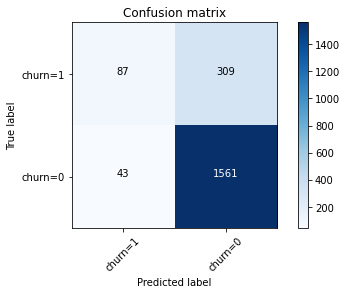

In [223]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [224]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1604
           1       0.67      0.22      0.33       396

    accuracy                           0.82      2000
   macro avg       0.75      0.60      0.61      2000
weighted avg       0.80      0.82      0.79      2000



### False-negativ score extrimly high, lets try something else.

## Random forest

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [226]:
rfc=RandomForestClassifier(random_state=42)

### Grid search

In [227]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [228]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [229]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [230]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [231]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [232]:
pred=rfc1.predict(X_test)

In [233]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8675


Confusion matrix, without normalization
[[ 171  225]
 [  40 1564]]


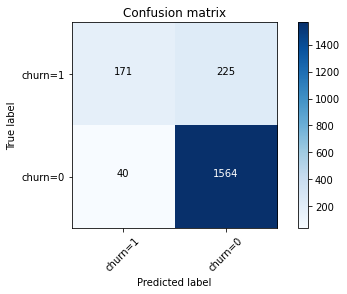

In [234]:
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [235]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1604
           1       0.67      0.22      0.33       396

    accuracy                           0.82      2000
   macro avg       0.75      0.60      0.61      2000
weighted avg       0.80      0.82      0.79      2000



In [236]:
df.groupby('churn').agg('count')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


### False-negativ results not better


## Lets try to change sample


In [237]:
df_0=df2.loc[df['churn'] == 0]
df_0.shape

(7963, 15)

In [238]:
df_1=df2.loc[df['churn'] == 1]
df_1.shape

(2037, 15)

In [239]:
df_0s=df_0.sample(n=2037)
df_0s.shape

(2037, 15)

In [240]:
df_0s.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
7217,15720353,0.406,0.310811,0.1,0.000000,2,1,0,0.453022,0,1,0,0,0,1
9606,15678057,0.348,0.351351,1.0,0.472578,2,0,0,0.410567,0,1,0,0,0,1
9953,15655952,0.400,0.391892,0.2,0.000000,2,1,1,0.485275,0,1,0,0,0,1
5286,15690540,0.668,0.310811,0.1,0.534787,1,0,0,0.887560,0,0,0,1,1,0
9605,15733444,0.772,0.148649,0.9,0.000000,2,0,0,0.880790,0,1,0,0,1,0


In [241]:
df_eq = pd.concat([df_0s, df_1])
df_eq.shape

(4074, 15)

In [242]:
X1 = np.asarray(df_eq[['customer_id', 'credit_score', 'age', 'balance',
       'products_number', 'active_member', 'estimated_salary',
        'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male']])
X1[0:5]

array([[1.57e+07, 4.06e-01, 3.11e-01, 0.00e+00, 2.00e+00, 0.00e+00,
        4.53e-01, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.57e+07, 3.48e-01, 3.51e-01, 4.73e-01, 2.00e+00, 0.00e+00,
        4.11e-01, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.57e+07, 4.00e-01, 3.92e-01, 0.00e+00, 2.00e+00, 1.00e+00,
        4.85e-01, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.57e+07, 6.68e-01, 3.11e-01, 5.35e-01, 1.00e+00, 0.00e+00,
        8.88e-01, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.57e+07, 7.72e-01, 1.49e-01, 0.00e+00, 2.00e+00, 0.00e+00,
        8.81e-01, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00]])

In [243]:
df_eq['churn'] = df_eq['churn'].astype('int')
Y1= np.asarray(df_eq['churn'])
Y1[0:5]

array([0, 0, 0, 0, 0])

In [244]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, Y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (3259, 12) (3259,)
Test set: (815, 12) (815,)


In [246]:
CV_rfc1 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc1.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [247]:
CV_rfc1.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [248]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=5, criterion='entropy')

In [249]:
rfc2.fit(X1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=42)

In [255]:
pred2=rfc2.predict(X_test)

In [257]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))

Accuracy for Random Forest on CV data:  0.616


Confusion matrix, without normalization
[[324  72]
 [696 908]]


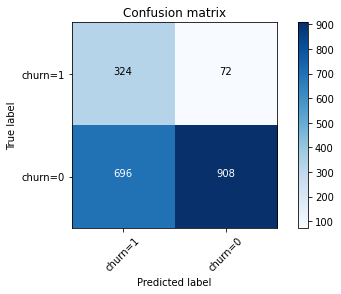

In [258]:
cnf_matrix = confusion_matrix(y_test, pred2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### As we see using balanced method for train set dramatically increase false-negative mistakes number

In [261]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X, Y, test_size=0.4, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (6000, 12) (6000,)
Test set: (4000, 12) (4000,)


## Logreg2

In [262]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,error_score='raise')
logreg_cv.fit(X1_train,y1_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.5038357715903727


In [263]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X1_train,y1_train)
print("score",logreg2.score(X1_test,y1_test))

score 0.48466257668711654


# Neural network

###  Lets try to use neural netvork to increase our results

In [375]:
model = Sequential()
model.add(Dense(12, input_shape=(12,), activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 12)                156       
                                                                 
 dense_73 (Dense)            (None, 8)                 104       
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
None


In [376]:
X_train.shape

(8000, 12)

In [377]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [378]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
800/800 [==============================] - 1s 1ms/step - loss: 0.5033 - accuracy: 0.7763
Epoch 2/150
800/800 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8158
Epoch 3/150
800/800 [==============================] - 1s 1ms/step - loss: 0.4074 - accuracy: 0.8304
Epoch 4/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3801 - accuracy: 0.8436
Epoch 5/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3623 - accuracy: 0.8499
Epoch 6/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3528 - accuracy: 0.8547
Epoch 7/150
800/800 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8560
Epoch 8/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3450 - accuracy: 0.8589
Epoch 9/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8589
Epoch 10/150
800/800 [==============================] - 1s 1ms/step - loss: 0.3414 - accura

In [379]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8660
Accuracy: 86.60


In [380]:
predictions = (model.predict(X_test) > 0.5).astype(int)

63/63 [==============================] - 0s 903us/step


Confusion matrix, without normalization
[[ 203  193]
 [  75 1529]]


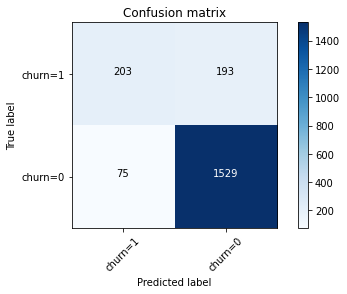

In [381]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [382]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1604
           1       0.73      0.51      0.60       396

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
### So we get best redult by neural network
